In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [ ]:
start_date = '2019-01-01'
end_date = '2023-01-01'

In [17]:
def RSIcalc(asset): #names
    df = yf.download(asset,start=start_date, end = end_date)
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['Price Change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['Price Change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up'] = df["Upmove"].ewm(span=19).mean()
    df['Avg Down'] = df["Downmove"].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = (df['Avg Up']/df['Avg Down'])
    df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI']<45), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI']>45), 'Buy'] = 'No'
    return df

In [18]:
stock = 'TSLA'

In [20]:
df = pd.DataFrame()
df = RSIcalc(stock)
df.query('Close > MA200 & RSI < 46')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,Price Change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2020-02-27,48.666668,49.318001,44.599998,45.266666,45.266666,364158000,22.786057,-0.128146,0.000000,0.128146,0.020398,0.029836,0.683677,40.606191,Yes
2020-02-28,41.980000,46.034668,40.768002,44.532665,44.532665,363343500,22.931283,-0.016215,0.000000,0.016215,0.018359,0.028474,0.644744,39.200273,Yes
2020-03-06,46.000000,47.133331,45.618000,46.898666,46.898666,189943500,23.792917,-0.029067,0.000000,0.029067,0.018888,0.022718,0.831414,45.397386,No
2020-03-09,40.359333,44.200001,40.333332,40.533333,40.533333,256105500,23.931340,-0.135725,0.000000,0.135725,0.016999,0.034018,0.499700,33.319983,Yes
2020-03-10,43.962002,44.533333,40.533333,43.021999,43.021999,233916000,24.081287,0.061398,0.061398,0.000000,0.021439,0.030617,0.700238,41.184718,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400,276.102350,-0.050943,0.000000,0.050943,0.013654,0.018039,0.756905,43.081725,Yes
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700,276.424750,-0.022103,0.000000,0.022103,0.012289,0.018446,0.666206,39.983412,Yes
2022-03-03,292.923340,295.480011,277.533325,279.763336,279.763336,61623600,279.467350,-0.046142,0.000000,0.046142,0.015941,0.018816,0.847229,45.864871,No


In [21]:
def tellers(df):
    Buying_dates = []
    Selling_dates =[]
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 60:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
            
                    
    return Buying_dates, Selling_dates    

In [22]:
frame = RSIcalc(stock)
Buy, Sell = tellers(frame)

[*********************100%***********************]  1 of 1 completed


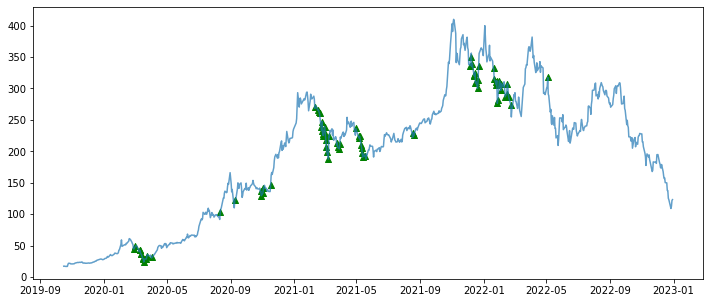

In [23]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[Buy].index , frame.loc[Buy]['Adj Close'], marker='^',c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [24]:
Profits = (frame.loc[Sell].Open.values - frame.loc[Buy].Open.values)/(frame.loc[Buy].Open.values)

In [25]:
Profits

array([-0.05510557, -0.33990383, -0.27619311, -0.14831307, -0.05767013,
       -0.1512605 ,  0.08681581,  0.13917871,  0.29562981,  0.16271112,
        0.17896681,  0.14183948,  0.15831211,  0.09591838,  0.23351094,
        0.01241587,  0.00970754,  0.03789342,  0.12310551, -0.02568618,
       -0.1383979 , -0.11693125, -0.16019971, -0.21250317, -0.21253802,
       -0.08147948, -0.01622535, -0.03683814, -0.04285714,  0.00576717,
       -0.02078578, -0.04523323,  0.04344308,  0.03280842,  0.1399384 ,
        0.11113485,  0.10566074,  0.06828486,  0.15765707,  0.28076444,
       -0.12609535, -0.18869117, -0.15535575, -0.10467105, -0.12528198,
        0.01346699,  0.00841509,  0.0310869 ,  0.09078267,  0.0944382 ,
        0.07344216, -0.09067305, -0.12194031,  0.06435692,  0.07250105,
        0.13615878,  0.12637305,  0.07960789,  0.17370489,  0.17895025,
        0.1710167 ,  0.11185104, -0.12649915, -0.09948413,  0.02103317,
       -0.00948375, -0.01830055, -0.02677419,  0.09388372, -0.01

In [26]:
Comisiones = 0.0025

In [27]:
dfr = pd.DataFrame()
dfr['Rendimientos'] = Profits
dfr['Utilidad'] = dfr['Rendimientos']-Comisiones

Monto = [1000000]



for i in range(len(dfr)):
    valor = Monto[-1]*(1+dfr['Rendimientos'][i])
    Monto.append(valor)
    
del Monto[0]
    
dfr['Monto'] = np.round(Monto,3)
dfr

,Rendimientos,Utilidad,Monto
0,-0.055106,-0.057606,944894.435
1,-0.339904,-0.342404,623721.201
2,-0.276193,-0.278693,451453.701
3,-0.148313,-0.150813,384497.217
4,-0.057670,-0.060170,362323.213
...,...,...,...
73,0.009413,0.006913,1135822.304
74,-0.030967,-0.033467,1100649.641
75,-0.033522,-0.036022,1063754.185
76,-0.046276,-0.048776,1014528.144


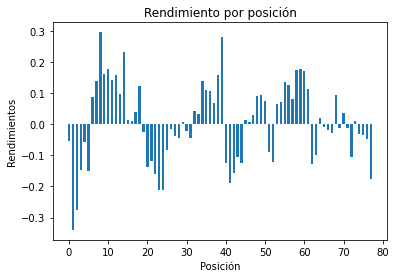

In [28]:
plt.bar(dfr.index, dfr.Rendimientos,width=0.6)
plt.xlabel("Posición")
plt.ylabel("Rendimientos")
plt.title("Rendimiento por posición")
plt.show()

In [29]:
wins = [i for i in Profits if i > 0]

In [30]:
len(wins)/len(Profits)

0.5256410256410257

In [31]:
Rendimiento = dfr.Rendimientos.sum()
Utilidad = dfr.Utilidad.sum()-0.1
Rendimiento, Utilidad

(0.4596018328057673, 0.16460183280576732)